<a href="https://colab.research.google.com/github/bhagyashreeekanamadi/BOGO/blob/main/House_rent_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('/content/indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [4]:
df.shape

(255, 9)

In [5]:
df.columns

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            255 non-null    object
 1   ingredients     255 non-null    object
 2   diet            255 non-null    object
 3   prep_time       255 non-null    int64 
 4   cook_time       255 non-null    int64 
 5   flavor_profile  255 non-null    object
 6   course          255 non-null    object
 7   state           255 non-null    object
 8   region          254 non-null    object
dtypes: int64(2), object(7)
memory usage: 18.1+ KB


In [7]:
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,1


In [8]:
df['region'].fillna('Unknown',inplace=True)

<ipython-input-8-ae194c0ecd25>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['region'].fillna('Unknown',inplace=True)


In [9]:
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,0


In [12]:
df[df['cook_time']==max(df['cook_time'])][['name','cook_time','prep_time','state','region']]

,name,cook_time,prep_time,state,region
62,Shrikhand,720,10,Maharashtra,West


In [15]:
len(df[df['diet']=='vegetarian'])

226

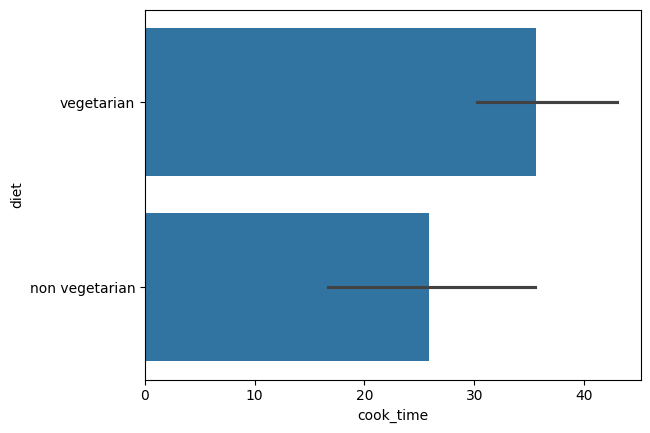

In [17]:
sns.barplot(x=df['cook_time'],y=df['diet'],data=df)
plt.show()

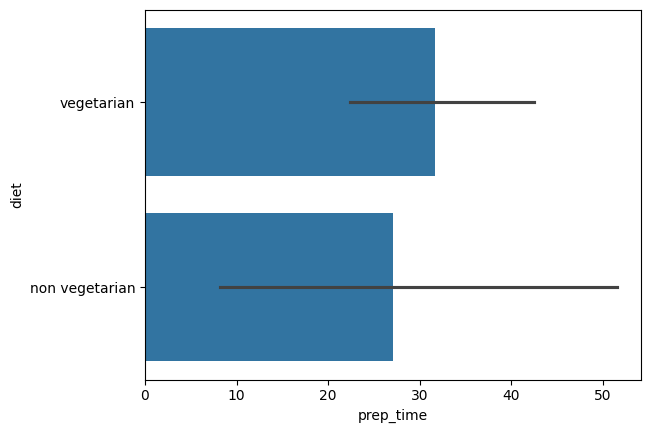

In [18]:
sns.barplot(x=df['prep_time'],y=df['diet'],data=df)
plt.show()

In [19]:
df['course'].unique()

array(['dessert', 'main course', 'starter', 'snack'], dtype=object)

In [20]:
df['flavor_profile'].unique()

array(['sweet', 'spicy', 'bitter', '-1', 'sour'], dtype=object)

In [21]:
df['state'].value_counts()

,count
state,
Gujarat,35
Punjab,32
Maharashtra,30
West Bengal,24
-1,24
Assam,21
Tamil Nadu,20
Andhra Pradesh,10
Uttar Pradesh,9


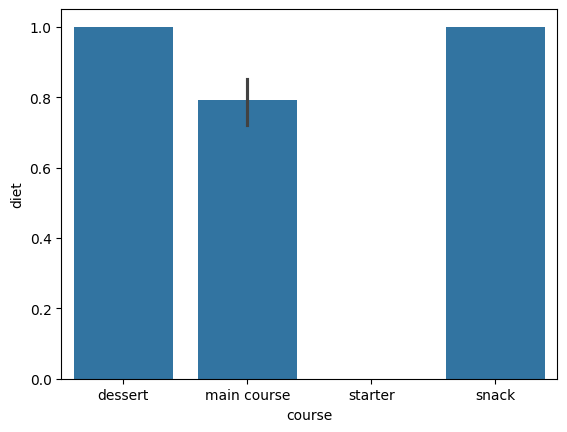

In [23]:
sns.barplot(x=df['course'],y=df['diet']=='vegetarian',data=df)
plt.show()

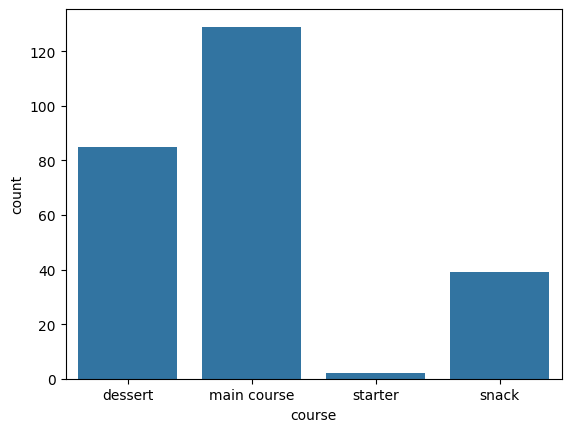

In [31]:
sns.countplot(x=df['course'],data=df[df['state']=='Karnataka'])
plt.show()

In [36]:
most_frequent_course = df['course'].value_counts().idxmax()
most_frequent_course

'main course'

In [37]:
df['course'].value_counts()

,count
course,
main course,129
dessert,85
snack,39
starter,2


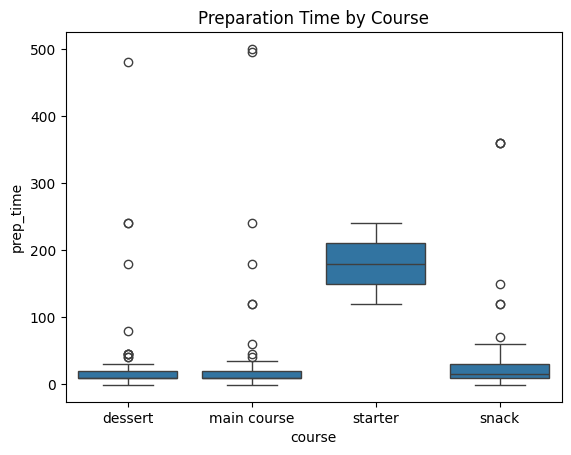

In [39]:
sns.boxplot(x='course', y='prep_time', data=df)
plt.title('Preparation Time by Course')
plt.show()


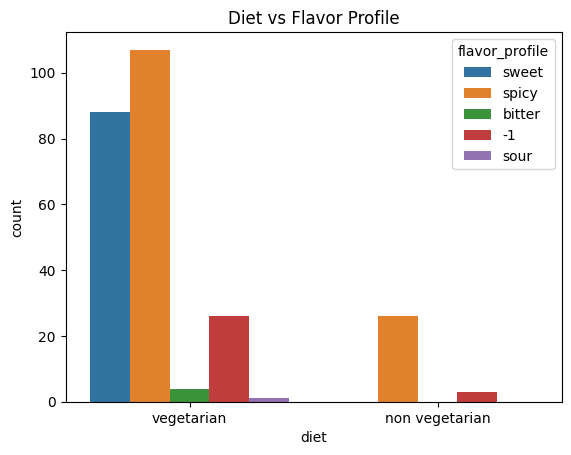

In [40]:
sns.countplot(x='diet', hue='flavor_profile', data=df)
plt.title('Diet vs Flavor Profile')
plt.show()


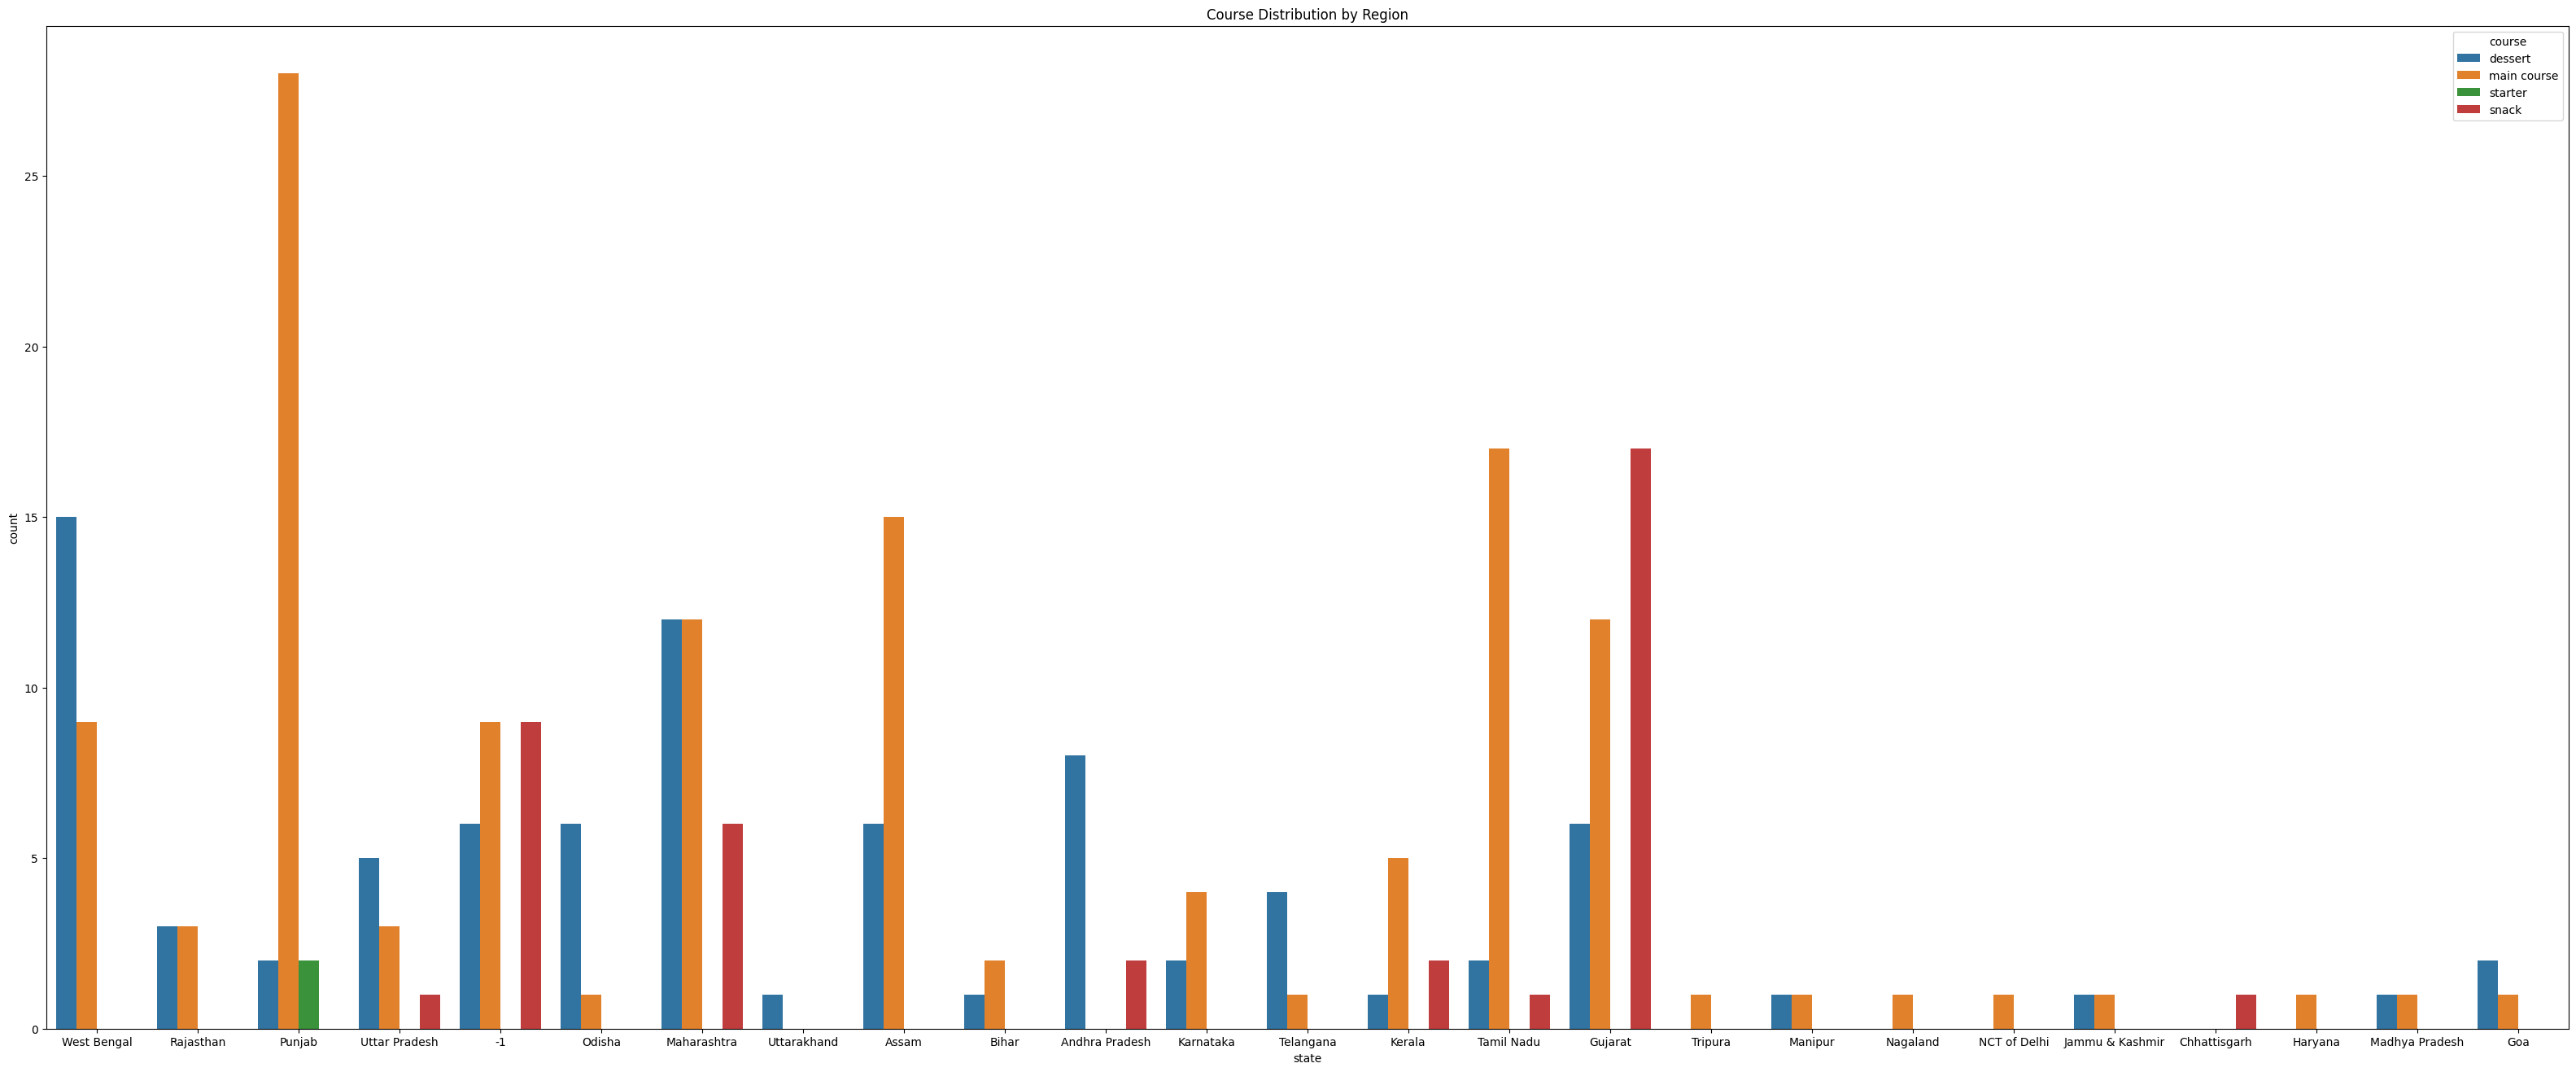

In [46]:
plt.figure(figsize=(40, 16))
sns.countplot(x='state', hue='course', data=df)
plt.title('Course Distribution by Region')
plt.show()


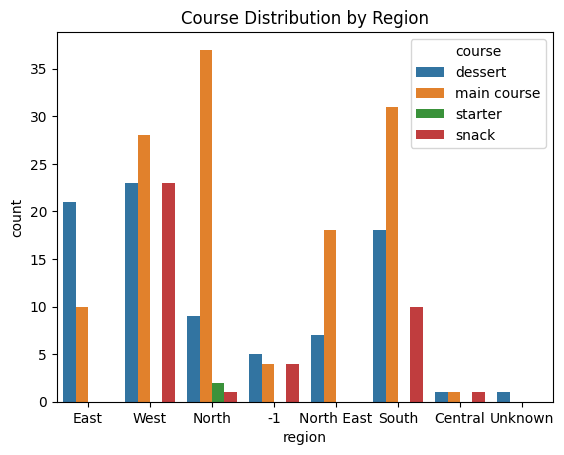

In [47]:
sns.countplot(x='region', hue='course', data=df)
plt.title('Course Distribution by Region')
plt.show()


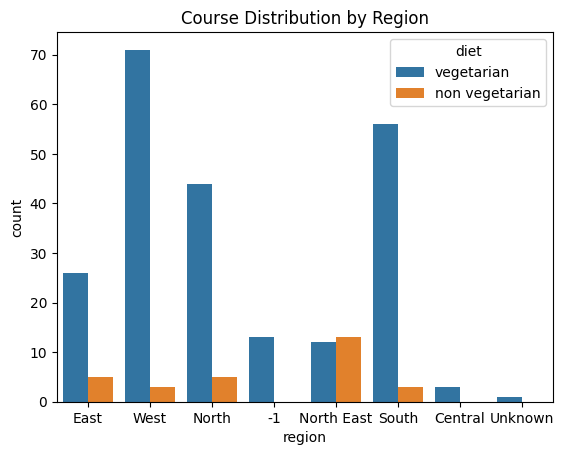

In [48]:
sns.countplot(x='region', hue='diet', data=df)
plt.title('Course Distribution by Region')
plt.show()


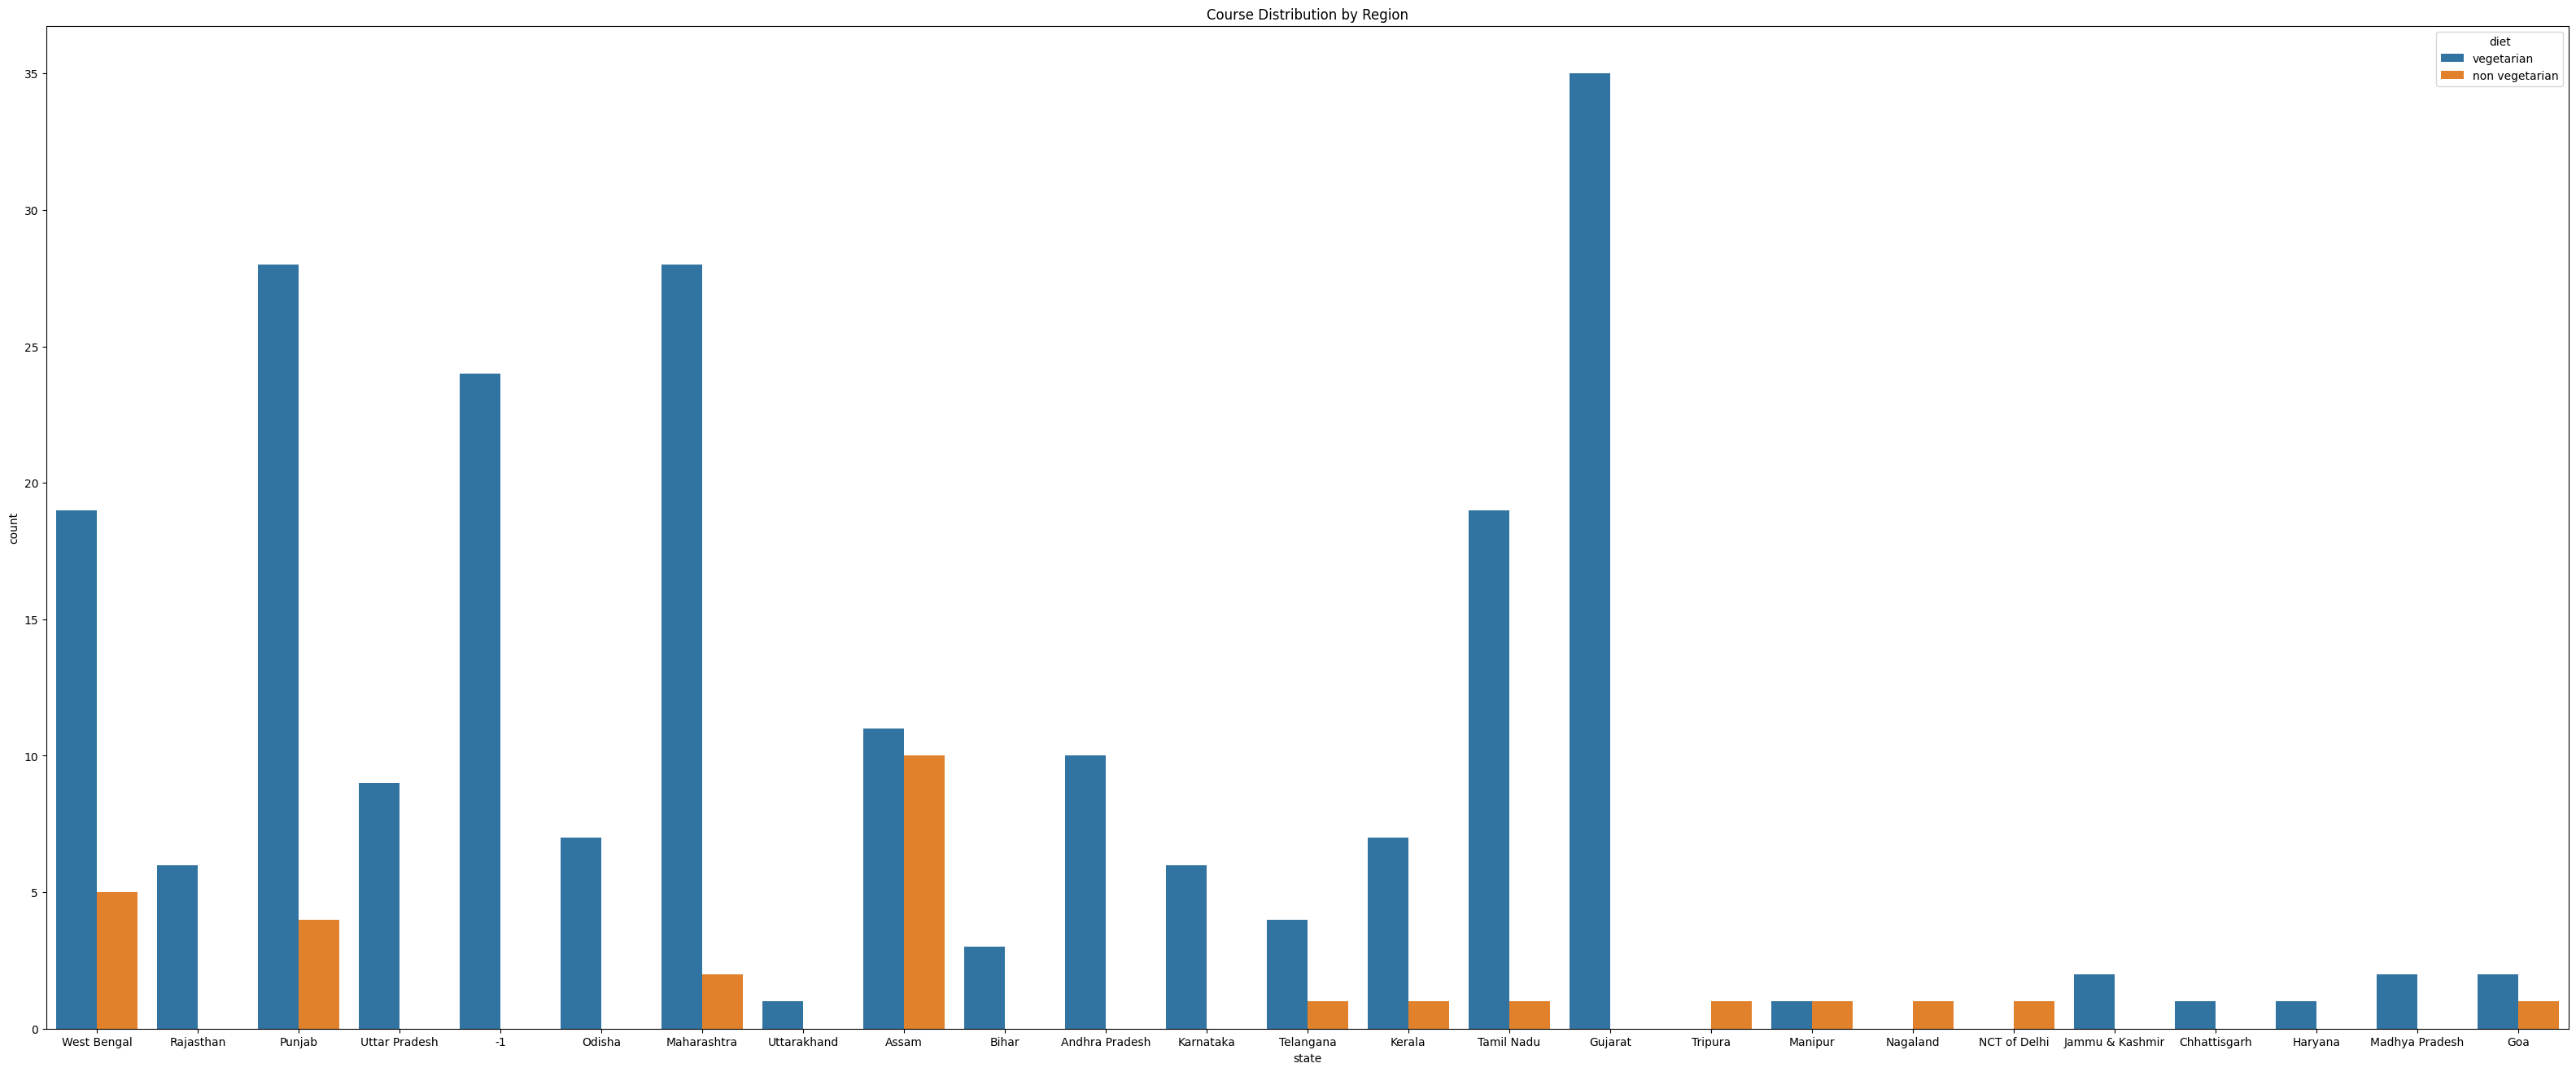

In [49]:
plt.figure(figsize=(40, 16))
sns.countplot(x='state', hue='diet', data=df)
plt.title('Course Distribution by Region')
plt.show()

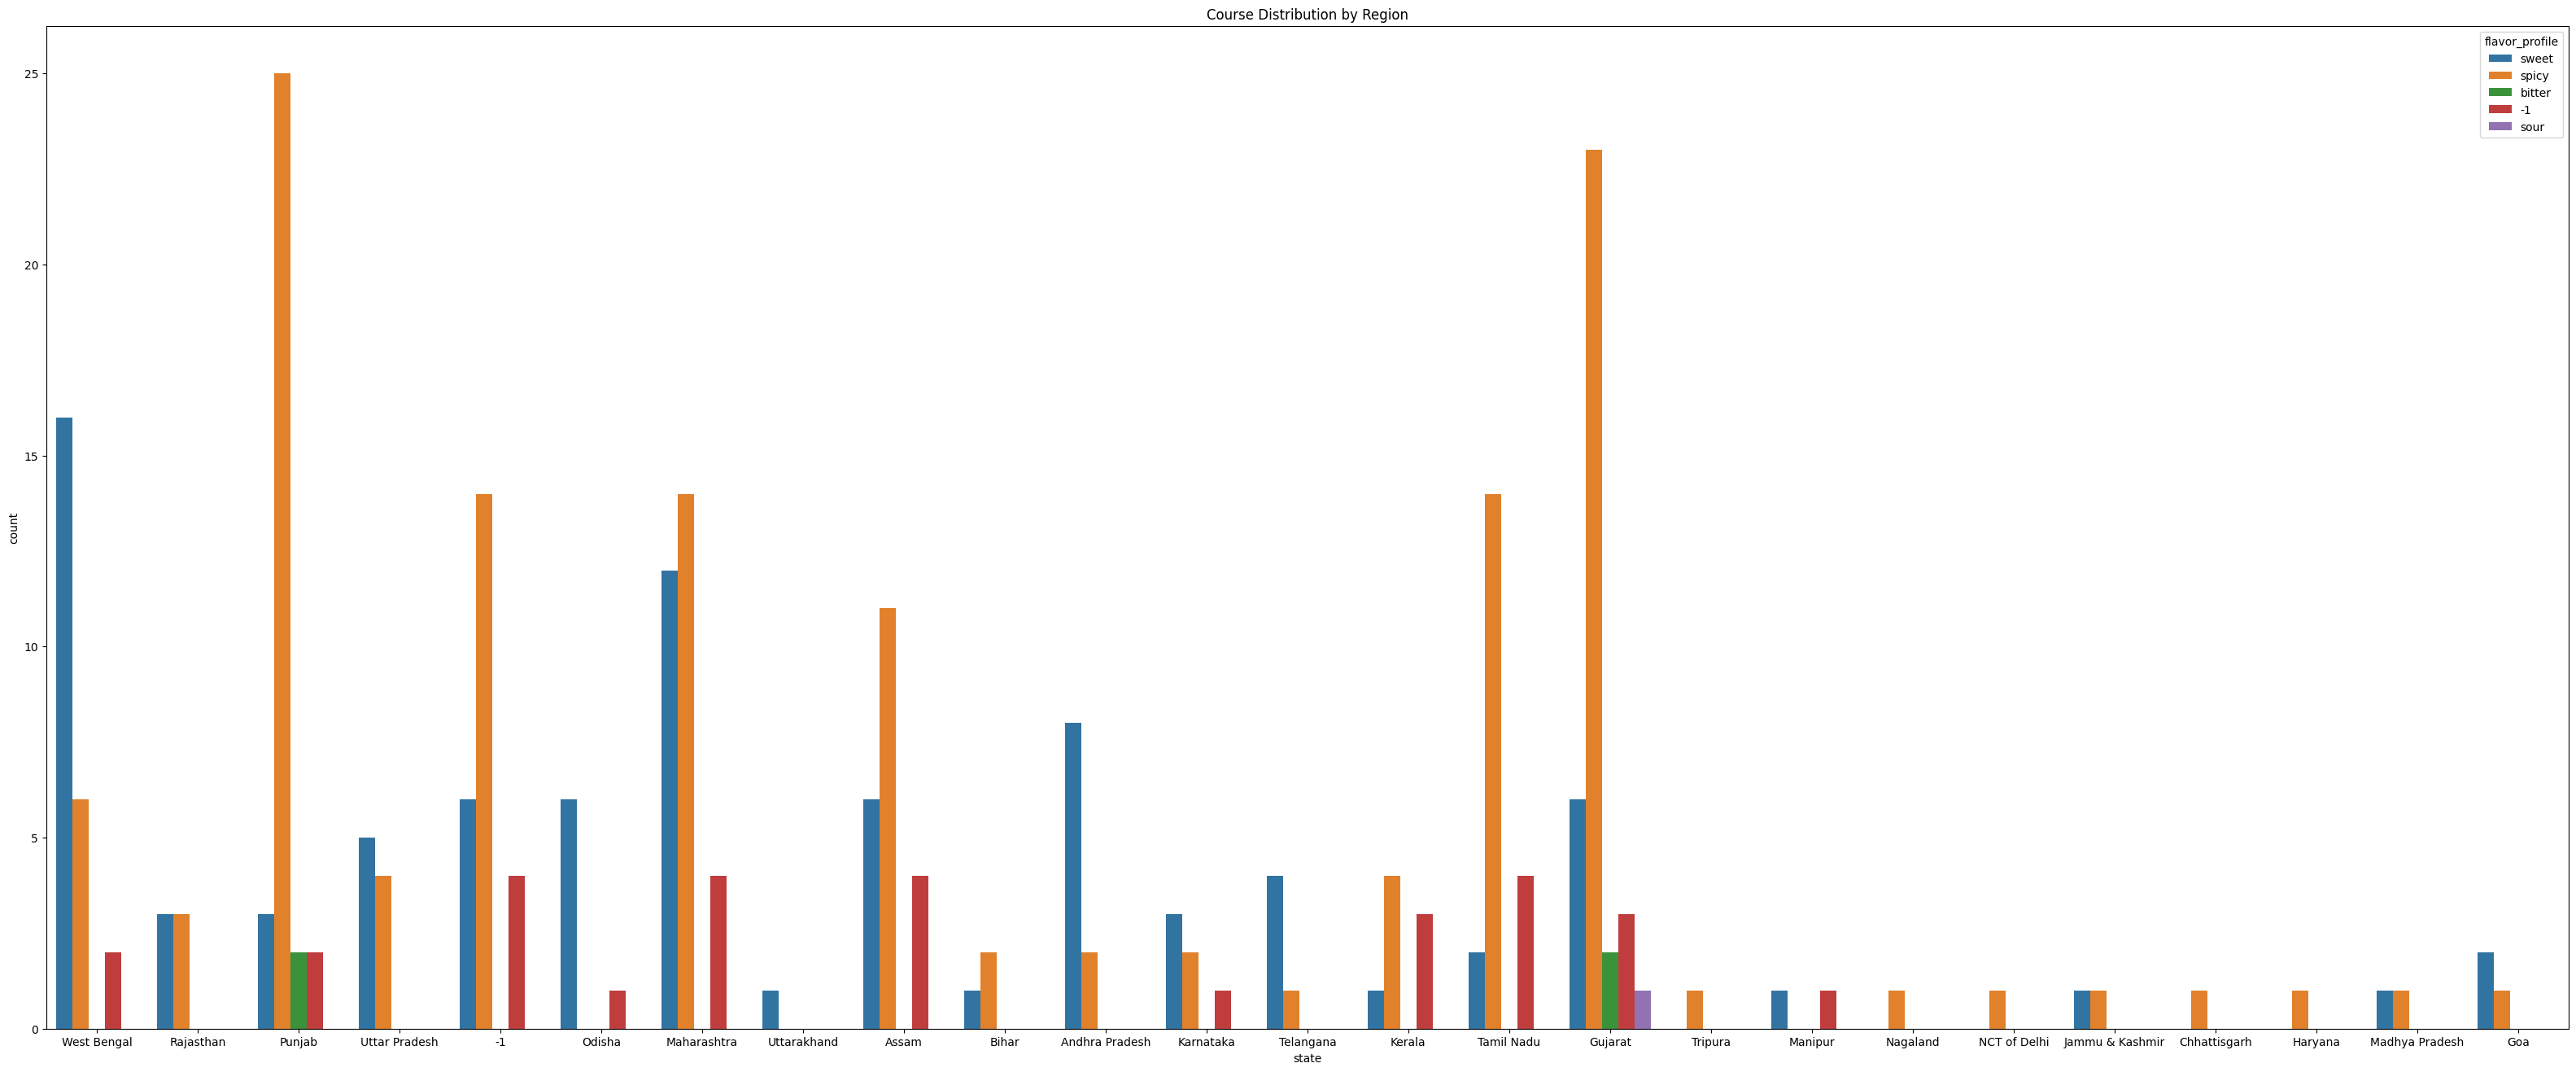

In [50]:
plt.figure(figsize=(40, 16))
sns.countplot(x='state', hue='flavor_profile', data=df)
plt.title('Course Distribution by Region')
plt.show()

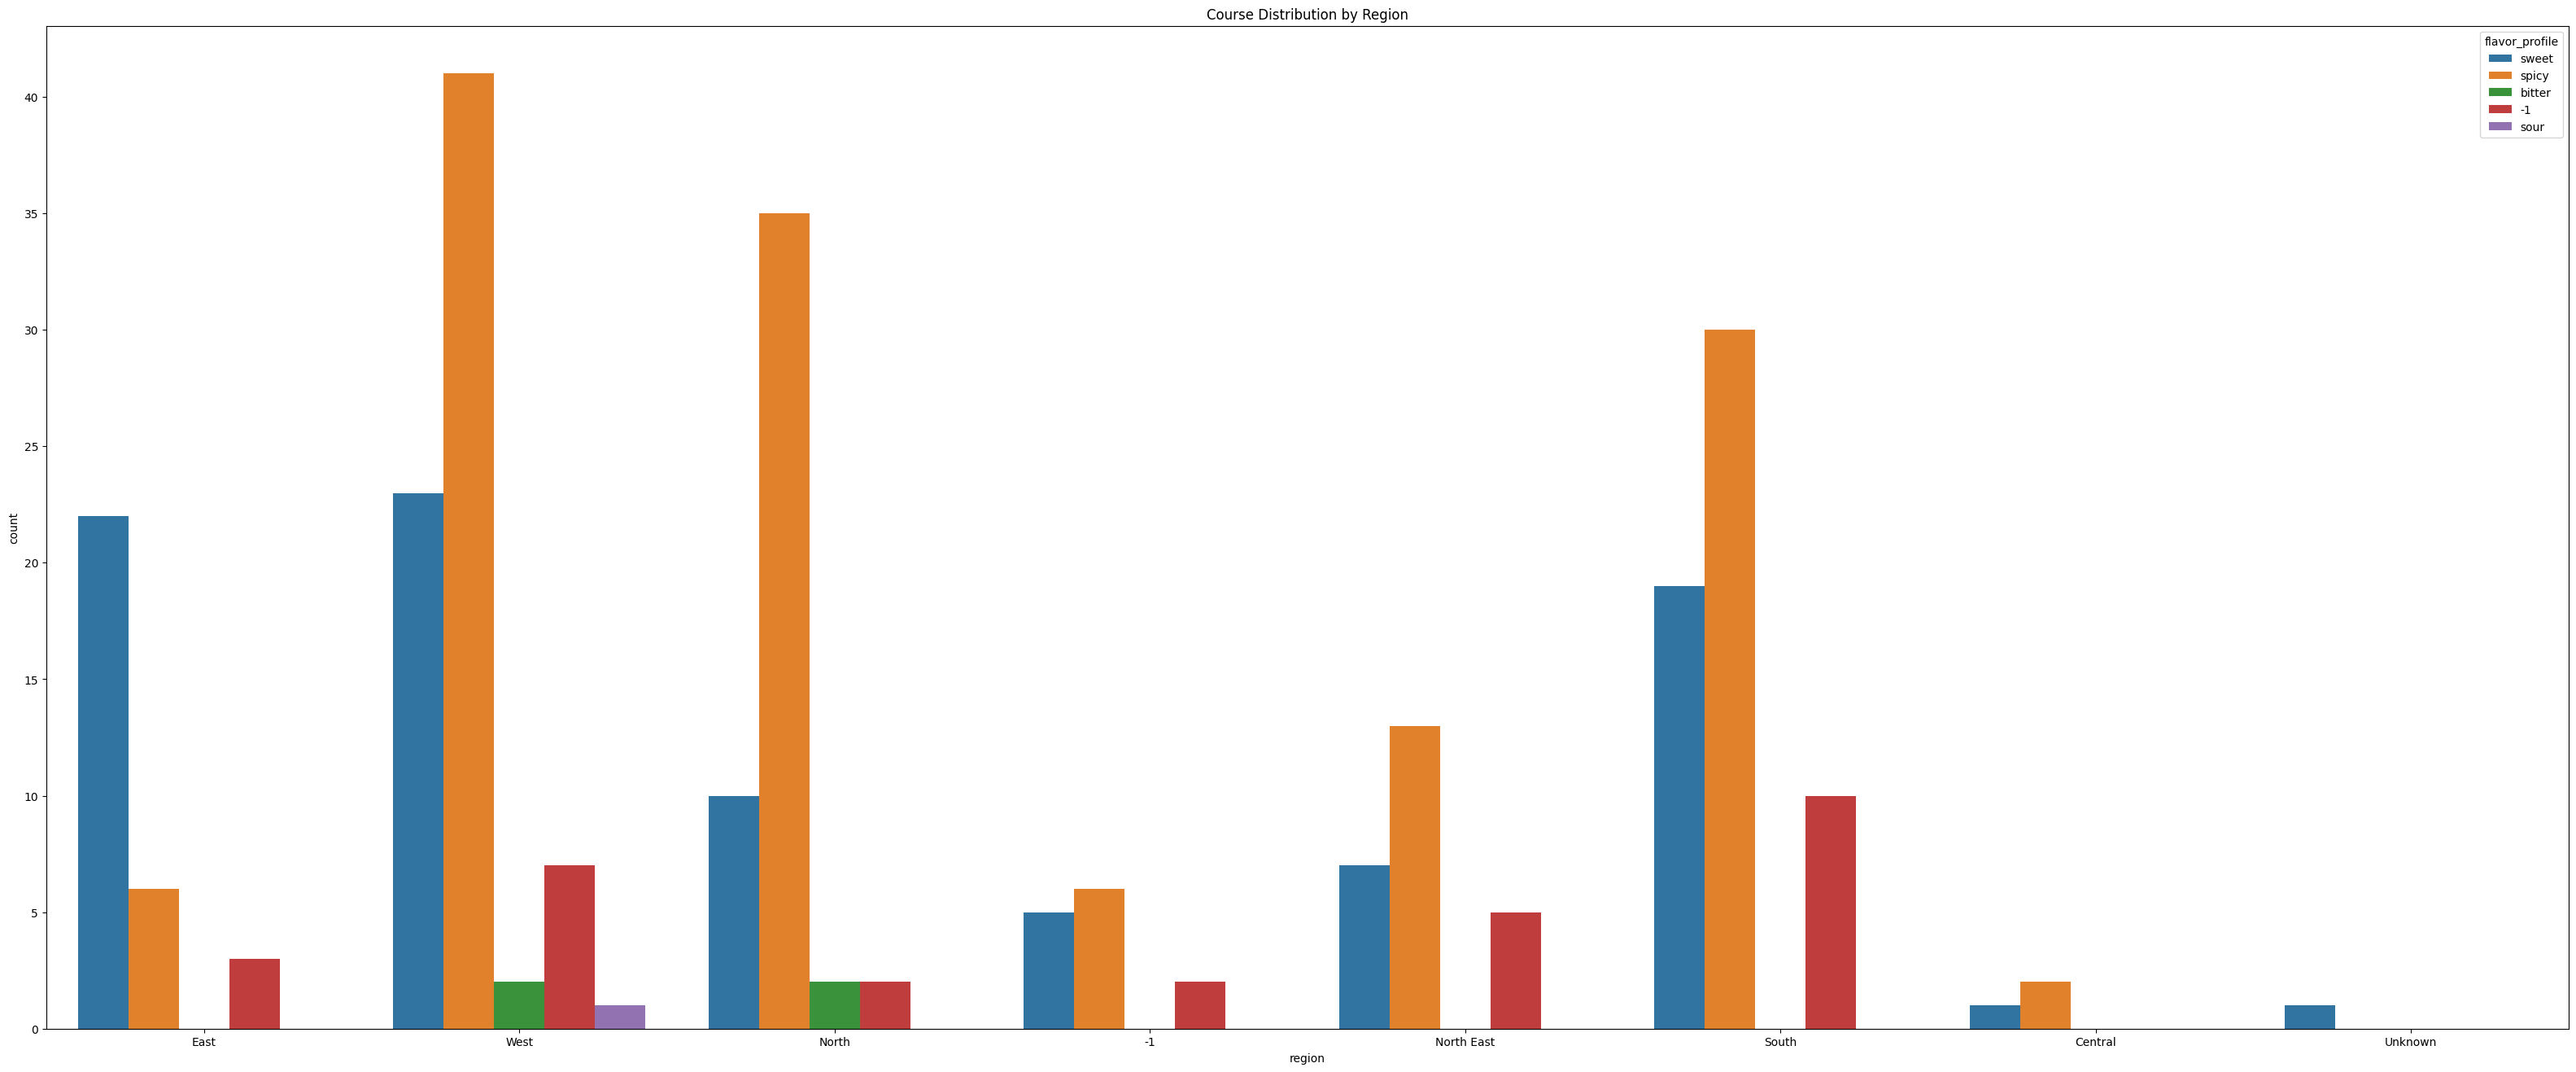

In [51]:
plt.figure(figsize=(40, 16))
sns.countplot(x='region', hue='flavor_profile', data=df)
plt.title('Course Distribution by Region')
plt.show()

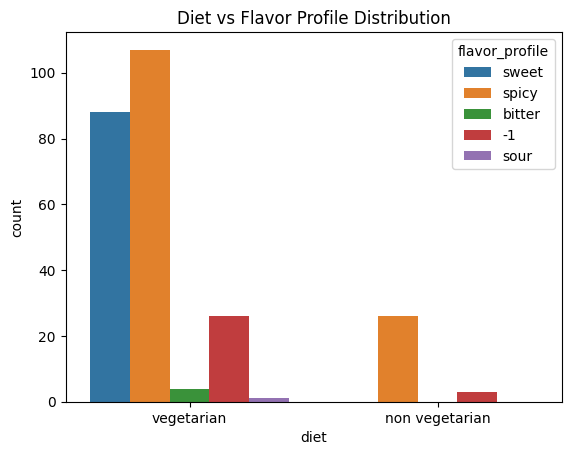

In [52]:
sns.countplot(x='diet', hue='flavor_profile', data=df)
plt.title('Diet vs Flavor Profile Distribution')
plt.show()


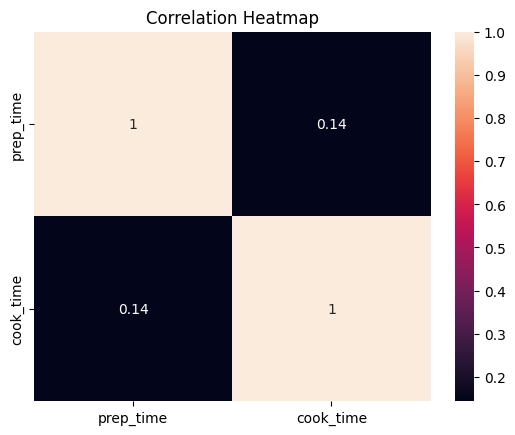

In [54]:
corr = df[['prep_time', 'cook_time']].corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()
